<a href="https://colab.research.google.com/github/hail-members/pattern-recognition-machine-learning/blob/main/4_linear_classification_logistic_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 선형 분류 linear classification

이전에 봤던 예시랑 같은 데이터를 이제는 분류로 봅시다.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

x1 = np.array([0,1,2,3])
x2 = np.array([3,2,8,10])
y  = np.array([0,0,1,1])


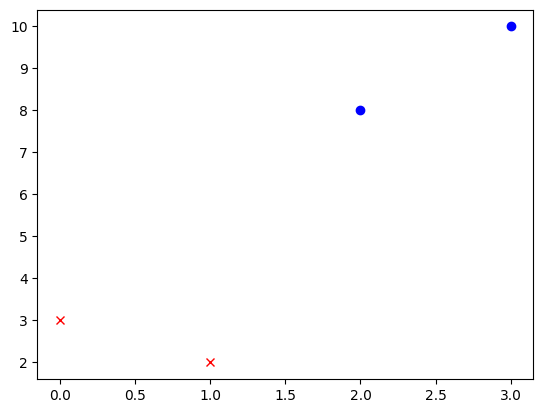

In [2]:
%matplotlib inline

# plot different class with different sign
for i in range(len(y)):
    if y[i] == 0:
        plt.plot(x1[i], x2[i], 'xr')
    else:
        plt.plot(x1[i], x2[i], 'ob')

적절한 라인을 그려보면 둘 사이를 잘 나눌 수 있어야 할건데

LSM + MSE 를 통해서 얻은 선이 어떻게 되는지 한번 확인해보자.

In [3]:
def func(x,w):
 return w[0]+w[1]*x[0]+w[2]*x[1]

def gradient_descent(x1, x2, y, w_init, lr, iters):
  w = w_init
  for _ in range(iters):
    y_hat = func([x1, x2], w)
    grad = grad_mse(np.array([x1, x2]), y, y_hat, w)
    w = w - lr * grad
    print('w:', w)
    # print('grad:',grad)
    # print loss
    loss = np.sum((y_hat-y)**2)
    print('error:', loss)

  return w

def grad_mse(x, y, y_hat, w):
  grad_w0 = 2 * np.mean(y_hat - y)
  grad_w1 = 2 * np.mean((y_hat - y) * x[0])
  grad_w2 = 2 * np.mean((y_hat - y) * x[1])

  grad = np.array([grad_w0, grad_w1, grad_w2])

  return grad


x1 = np.array([0, 1, 2, 3])
x2 = np.array([3, 2, 8, 10])
y  = np.array([0,0,1,1])

w_init = np.array([-1,0.5,0.5])
lr = 1e-3
iters = int(1e5)

w = gradient_descent(x1, x2, y, w_init, lr, iters)

print("Learned weights:", w)

스트리밍 출력 내용이 길어서 마지막 5000줄이 삭제되었습니다.
error: 0.054216867469879505
w: [-0.3253012   0.04216867  0.13253012]
error: 0.054216867469879505
w: [-0.3253012   0.04216867  0.13253012]
error: 0.054216867469879505
w: [-0.3253012   0.04216867  0.13253012]
error: 0.054216867469879505
w: [-0.3253012   0.04216867  0.13253012]
error: 0.054216867469879505
w: [-0.3253012   0.04216867  0.13253012]
error: 0.054216867469879505
w: [-0.3253012   0.04216867  0.13253012]
error: 0.054216867469879505
w: [-0.3253012   0.04216867  0.13253012]
error: 0.054216867469879505
w: [-0.3253012   0.04216867  0.13253012]
error: 0.054216867469879505
w: [-0.3253012   0.04216867  0.13253012]
error: 0.054216867469879505
w: [-0.3253012   0.04216867  0.13253012]
error: 0.054216867469879505
w: [-0.3253012   0.04216867  0.13253012]
error: 0.054216867469879505
w: [-0.3253012   0.04216867  0.13253012]
error: 0.054216867469879505
w: [-0.3253012   0.04216867  0.13253012]
error: 0.054216867469879505
w: [-0.3253012   0.04216867  0.13253012

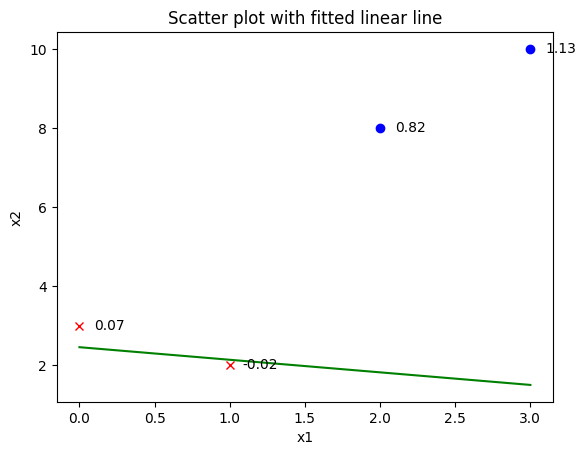

In [4]:
%matplotlib inline

# plot different class with different sign
for i in range(len(y)):
    if y[i] == 0:
        plt.plot(x1[i], x2[i], 'xr')
    else:
        plt.plot(x1[i], x2[i], 'ob')

x_line = np.linspace(np.min(x1), np.max(x1), 100)
y_line = -(w[0] + w[1] * x_line) / w[2]
plt.plot(x_line, y_line, 'g-')

# Set labels and title
plt.xlabel('x1')
plt.ylabel('x2')
plt.title('Scatter plot with fitted linear line')

# Overlay estimated value with func
for i in range(len(y)):
    plt.text(x1[i]+0.2, x2[i], f'{func([x1[i], x2[i]], w):.2f}', ha='center', va='center')


# Show the plot
plt.show()


사실... y값을 0 또는 1이 아닌 다른 방식으로 하면 조금 더 나은 결과를 얻을 수도 있습니다.

In [5]:
def func(x,w):
 return w[0]+w[1]*x[0]+w[2]*x[1]

def gradient_descent(x1, x2, y, w_init, lr, iters):
  w = w_init
  for _ in range(iters):
    y_hat = func([x1, x2], w)
    grad = grad_mse(np.array([x1, x2]), y, y_hat, w)
    w = w - lr * grad
    print('w:', w)
    # print('grad:',grad)
    # print loss
    loss = np.sum((y_hat-y)**2)
    print('error:', loss)

  return w

def grad_mse(x, y, y_hat, w):
  grad_w0 = 2 * np.mean(y_hat - y)
  grad_w1 = 2 * np.mean((y_hat - y) * x[0])
  grad_w2 = 2 * np.mean((y_hat - y) * x[1])

  grad = np.array([grad_w0, grad_w1, grad_w2])

  return grad


x1 = np.array([0, 1, 2, 3])
x2 = np.array([3, 2, 8, 10])
y  = np.array([-1,-1,1,1])

w_init = np.array([-1,0.5,0.5])
lr = 1e-3
iters = int(1e5)

w = gradient_descent(x1, x2, y, w_init, lr, iters)

print("Learned weights:", w)

스트리밍 출력 내용이 길어서 마지막 5000줄이 삭제되었습니다.
error: 0.216867469879518
w: [-1.65060241  0.08433735  0.26506024]
error: 0.216867469879518
w: [-1.65060241  0.08433735  0.26506024]
error: 0.216867469879518
w: [-1.65060241  0.08433735  0.26506024]
error: 0.216867469879518
w: [-1.65060241  0.08433735  0.26506024]
error: 0.216867469879518
w: [-1.65060241  0.08433735  0.26506024]
error: 0.216867469879518
w: [-1.65060241  0.08433735  0.26506024]
error: 0.216867469879518
w: [-1.65060241  0.08433735  0.26506024]
error: 0.216867469879518
w: [-1.65060241  0.08433735  0.26506024]
error: 0.216867469879518
w: [-1.65060241  0.08433735  0.26506024]
error: 0.216867469879518
w: [-1.65060241  0.08433735  0.26506024]
error: 0.216867469879518
w: [-1.65060241  0.08433735  0.26506024]
error: 0.216867469879518
w: [-1.65060241  0.08433735  0.26506024]
error: 0.216867469879518
w: [-1.65060241  0.08433735  0.26506024]
error: 0.216867469879518
w: [-1.65060241  0.08433735  0.26506024]
error: 0.216867469879518
w: [-1.65060241

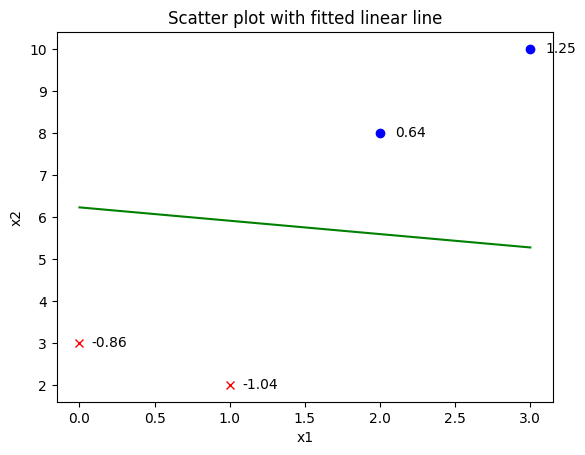

In [6]:
%matplotlib inline

# plot different class with different sign
for i in range(len(y)):
    if y[i] == -1:
        plt.plot(x1[i], x2[i], 'xr')
    else:
        plt.plot(x1[i], x2[i], 'ob')

x_line = np.linspace(np.min(x1), np.max(x1), 100)
y_line = -(w[0] + w[1] * x_line) / w[2]
plt.plot(x_line, y_line, 'g-')

# Set labels and title
plt.xlabel('x1')
plt.ylabel('x2')
plt.title('Scatter plot with fitted linear line')


# Overlay estimated value with func
for i in range(len(y)):
    plt.text(x1[i]+0.2, x2[i], f'{func([x1[i], x2[i]], w):.2f}', ha='center', va='center')


# Show the plot
plt.show()


그러나 수업시간에 배웠던 대로, 데이터가 많을때 outlier 에 대해서 error가 과장되는 효과가 있습니다.

In [47]:
x1 = np.array([0, 1, 2, 3,      -100])
x2 = np.array([3, 2, 8, 10,     0])
y  = np.array([-1,-1,1,1,       -1])

<ipython-input-46-1ba5fa107ddb>:2: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-z))


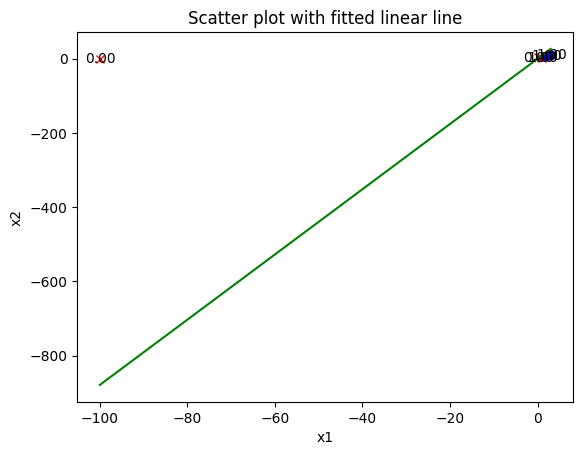

In [48]:
%matplotlib inline

# plot different class with different sign
for i in range(len(y)):
    if y[i] == -1:
        plt.plot(x1[i], x2[i], 'xr')
    else:
        plt.plot(x1[i], x2[i], 'ob')

x_line = np.linspace(np.min(x1), np.max(x1), 100)
y_line = -(w[0] + w[1] * x_line) / w[2]
plt.plot(x_line, y_line, 'g-')

# Set labels and title
plt.xlabel('x1')
plt.ylabel('x2')
plt.title('Scatter plot with fitted linear line')


# Overlay estimated value with func
for i in range(len(y)):
    plt.text(x1[i]+0.2, x2[i], f'{func([x1[i], x2[i]], w):.2f}', ha='center', va='center')


# Show the plot
plt.show()


In [49]:
def func(x,w):
 return w[0]+w[1]*x[0]+w[2]*x[1]

def gradient_descent(x1, x2, y, w_init, lr, iters):
  w = w_init
  for _ in range(iters):
    y_hat = func([x1, x2], w)
    grad = grad_mse(np.array([x1, x2]), y, y_hat, w)
    w_prior = w
    w = w - lr * grad
    print('w:', w)
    # print('grad:',grad)
    # print loss
    loss = np.sum((y_hat-y)**2)
    print('gradient:', grad)
    print('error:', loss)
    if np.isnan(w).any():
        print('nan')
        return w_prior

  return w

def grad_mse(x, y, y_hat, w):
  grad_w0 = 2 * np.mean(y_hat - y)
  grad_w1 = 2 * np.mean((y_hat - y) * x[0])
  grad_w2 = 2 * np.mean((y_hat - y) * x[1])

  grad = np.array([grad_w0, grad_w1, grad_w2])

  return grad

w_init = np.array([-1,0.5,0.5])
lr = 1e-3
iters = int(1e5)

w = gradient_descent(x1, x2, y, w_init, lr, iters)

print("Learned weights:", w)

w: [-0.9842 -1.5084  0.4694]
gradient: [ -15.8 2008.4   30.6]
error: 2533.75
w: [-1.04366592  4.52922864  0.4793824 ]
gradient: [   59.46592 -6037.62864    -9.9824 ]
error: 22764.654558880004
w: [ -0.87608991 -13.61989558   0.37328266]
gradient: [ -167.57601062 18149.12422106   106.09973734]
error: 205594.90691169433
w: [-1.39028    40.93745015  0.62161627]
gradient: [   514.19009453 -54557.34573176   -248.33360981]
error: 1857721.182030319
w: [   0.14562981 -123.06420973   -0.19040263]
gradient: [ -1535.90981597 164001.65988425    812.01889895]
error: 16786862.746419176
w: [ -4.48052403 369.93252019   2.18977091]
gradient: [   4626.15384144 -492996.72992003   -2380.17353857]
error: 151691255.9637683
w: [    9.41735389 -1112.03809398    -5.02154844]
gradient: [ -13897.87791468 1481970.61416403    7211.31934709]
error: 1370729461.703667
w: [ -32.36831491 3342.83380149   16.60366894]
gradient: [   41785.66879572 -4454871.89547248   -21625.21737782]
error: 12386339116.81475
w: [    93.233

<ipython-input-49-fa914ff7b147>:14: RuntimeWarning: overflow encountered in square
  loss = np.sum((y_hat-y)**2)
/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:88: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)


w: [ 2.81048721e+165 -2.99646530e+167 -1.45540000e+165]
gradient: [-3.74543208e+168  3.99327818e+170  1.93955760e+168]
error: inf
w: [-8.44845361e+165  9.00751228e+167  4.37499922e+165]
gradient: [ 1.12589408e+169 -1.20039776e+171 -5.83039921e+168]
error: inf
w: [ 2.53964395e+166 -2.70769955e+168 -1.31514485e+166]
gradient: [-3.38448931e+169  3.60845078e+171  1.75264478e+169]
error: inf
w: [-7.63428633e+166  8.13946919e+168  3.95338582e+166]
gradient: [ 1.01739303e+170 -1.08471687e+172 -5.26853067e+169]
error: inf
w: [ 2.29490153e+167 -2.44676181e+169 -1.18840593e+167]
gradient: [-3.05833016e+170  3.26070873e+172  1.58374451e+170]
error: inf
w: [-6.89857937e+167  7.35507837e+169  3.57240280e+167]
gradient: [ 9.19348089e+170 -9.80184018e+172 -4.76080873e+170]
error: inf
w: [ 2.07374463e+168 -2.21097033e+170 -1.07388069e+168]
gradient: [-2.76360257e+171  2.94647817e+173  1.43112097e+171]
error: inf
w: [-6.23377160e+168  6.64627834e+170  3.22813465e+168]
gradient: [ 8.30751623e+171 -8.857

<ipython-input-49-fa914ff7b147>:25: RuntimeWarning: overflow encountered in multiply
  grad_w1 = 2 * np.mean((y_hat - y) * x[0])
<ipython-input-49-fa914ff7b147>:2: RuntimeWarning: invalid value encountered in multiply
  return w[0]+w[1]*x[0]+w[2]*x[1]
<ipython-input-49-fa914ff7b147>:26: RuntimeWarning: invalid value encountered in multiply
  grad_w2 = 2 * np.mean((y_hat - y) * x[1])


# 로지스틱 회귀



$\hat{y} = \sigma(w^T x)$

이 때 $\sigma(z) = \frac{1}{1 + e^{-z}}$, $z = w^T x$ 로 쓸수도 있다고 했을때

교차엔트로피로 loss 함수를 계산한다면,

$L = -\left( y \log(\hat{y}) + (1 - y) \log(1 - \hat{y}) \right)$

미분시 연쇄법칙에 의해서

$\frac{\partial L}{\partial w} = \frac{\partial L}{\partial \hat{y}} \cdot \frac{\partial \hat{y}}{\partial z} \cdot \frac{\partial z}{\partial w}$

$\frac{\partial L}{\partial \hat{y}} = -\left( \frac{y}{\hat{y}} - \frac{1 - y}{1 - \hat{y}} \right)$

$\frac{\partial \hat{y}}{\partial z} = \hat{y} \cdot (1 - \hat{y})$

$\frac{\partial z}{\partial w} = x$


$$\frac{\partial L}{\partial w} = \frac{\partial L}{\partial \hat{y}} \cdot \frac{\partial \hat{y}}{\partial z} \cdot \frac{\partial z}{\partial w}$$
$$= \left(-\left( \frac{y}{\hat{y}} - \frac{1 - y}{1 - \hat{y}} \right)\right) \cdot (\hat{y} \cdot (1 - \hat{y})) \cdot x$$
$$= (-y (1 - \hat{y}) + (1 - y) \hat{y}) \cdot x$$
$$= (\hat{y} - y) \cdot x$$


In [50]:
import numpy as np
import matplotlib.pyplot as plt

x1 = np.array([0,1,2,3])
x2 = np.array([3,2,8,10])
y  = np.array([0,0,1,1])

In [51]:
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

def func(x, w):
    z = w[0] + w[1]*x[0] + w[2]*x[1]
    return sigmoid(z)

def cross_entropy(y, y_hat):
    eps = 1e-6
    return -np.mean(y*np.log(y_hat+eps) + (1-y)*np.log(1-y_hat+eps))

def gradient_descent(x1, x2, y, w_init, lr, iters):
    w = w_init
    for _ in range(iters):
        y_hat = func([x1, x2], w)
        grad = grad_mse(np.array([x1, x2]), y, y_hat, w)
        w_prior = w
        w = w - lr * grad
        loss = cross_entropy(y, y_hat)
        print('w:', w)
        print('error:', loss)
        if np.isnan(w).any():
            print('nan')
            return w_prior
        if np.abs(loss)<1e-6:
          return w

    return w

def grad_mse(x, y, y_hat, w):
    grad_w0 = np.mean(y_hat - y)
    grad_w1 = np.mean((y_hat - y) * x[0])
    grad_w2 = np.mean((y_hat - y) * x[1])
    grad = np.array([grad_w0, grad_w1, grad_w2])
    return grad



w_init = np.array([-1,0.5,0.5])
lr = 1e-3
iters = int(1e5)

w = gradient_descent(x1, x2, y, w_init, lr, iters)

print("Learned weights:", w)

스트리밍 출력 내용이 길어서 마지막 5000줄이 삭제되었습니다.
error: 0.03591714443176445
w: [-5.55139689  1.09732966  0.84783522]
error: 0.03591679594764105
w: [-5.55141519  1.097332    0.84783807]
error: 0.03591644747017971
w: [-5.55143349  1.09733433  0.84784091]
error: 0.03591609899938016
w: [-5.55145179  1.09733666  0.84784376]
error: 0.03591575053524218
w: [-5.55147009  1.097339    0.84784661]
error: 0.03591540207776568
w: [-5.55148839  1.09734133  0.84784945]
error: 0.03591505362695041
w: [-5.55150669  1.09734367  0.8478523 ]
error: 0.0359147051827961
w: [-5.55152499  1.097346    0.84785515]
error: 0.03591435674530275
w: [-5.55154329  1.09734834  0.847858  ]
error: 0.035914008314469996
w: [-5.55156159  1.09735067  0.84786084]
error: 0.03591365989029773
w: [-5.55157989  1.097353    0.84786369]
error: 0.035913311472785904
w: [-5.55159819  1.09735534  0.84786654]
error: 0.03591296306193402
w: [-5.55161648  1.09735767  0.84786938]
error: 0.03591261465774211
w: [-5.55163478  1.09736001  0.84787223]
error: 0.03

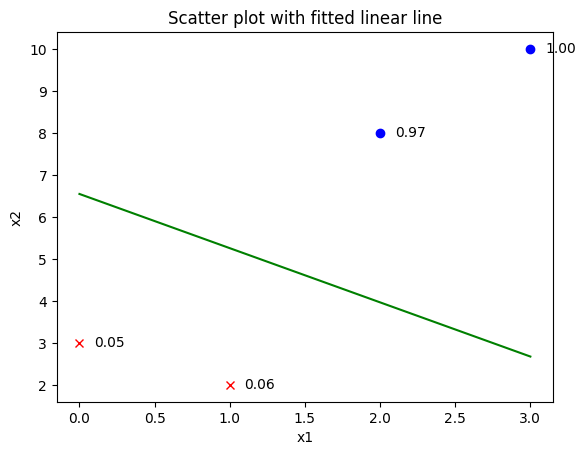

In [52]:
%matplotlib inline

# plot different class with different sign
for i in range(len(y)):
    if y[i] == 0:
        plt.plot(x1[i], x2[i], 'xr')
    else:
        plt.plot(x1[i], x2[i], 'ob')

x_line = np.linspace(np.min(x1), np.max(x1), 100)
y_line = -(w[0] + w[1] * x_line) / w[2]
plt.plot(x_line, y_line, 'g-')

# Set labels and title
plt.xlabel('x1')
plt.ylabel('x2')
plt.title('Scatter plot with fitted linear line')


# Overlay estimated value with func
for i in range(len(y)):
    plt.text(x1[i]+0.2, x2[i], f'{func([x1[i], x2[i]], w):.2f}', ha='center', va='center')


# Show the plot
plt.show()


In [53]:
x1 = np.array([0, 1, 2, 3,      -100])
x2 = np.array([3, 2, 8, 10,     0])
y  = np.array([-1,-1,1,1,       -1])

In [56]:
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

def func(x, w):
    z = w[0] + w[1]*x[0] + w[2]*x[1]
    return sigmoid(z)

def cross_entropy(y, y_hat):
    eps = 1e-6
    return -np.mean(y*np.log(y_hat+eps) + (1-y)*np.log(1-y_hat+eps))

def gradient_descent(x1, x2, y, w_init, lr, iters):
    w = w_init
    for _ in range(iters):
        y_hat = func([x1, x2], w)
        grad = grad_mse(np.array([x1, x2]), y, y_hat, w)
        w_prior = w
        w = w - lr * grad
        loss = cross_entropy(y, y_hat)
        print('w:', w)
        print('error:', loss)
        if np.isnan(w).any():
            print('nan')
            return w_prior
        if np.abs(loss)<0.05:
          return w

    return w

def grad_mse(x, y, y_hat, w):
    grad_w0 = np.mean(y_hat - y)
    grad_w1 = np.mean((y_hat - y) * x[0])
    grad_w2 = np.mean((y_hat - y) * x[1])
    grad = np.array([grad_w0, grad_w1, grad_w2])
    return grad



w_init = np.array([-1,0.5,0.5])
lr = 1e-3
iters = int(1e5)

w = gradient_descent(x1, x2, y, w_init, lr, iters)

print("Learned weights:", w)

w: [-5.00064628  1.01977904  0.99889218]
error: -3.51091911027689
w: [-5.00129287  1.03955763  0.99778354]
error: -3.5080605474722106
w: [-5.00193978  1.05933577  0.9966741 ]
error: -3.505195397110471
w: [-5.00258702  1.07911347  0.99556384]
error: -3.502323626312271
w: [-5.00323458  1.09889071  0.99445278]
error: -3.4994452008104213
w: [-5.00388248  1.1186675   0.9933409 ]
error: -3.49656008499005
w: [-5.0045307   1.13844384  0.99222822]
error: -3.4936682419279115
w: [-5.00517927  1.15821972  0.99111472]
error: -3.490769633430923
w: [-5.00582818  1.17799513  0.99000041]
error: -3.487864220074008
w: [-5.00647744  1.19777008  0.98888529]
error: -3.484951961237271
w: [-5.00712705  1.21754457  0.98776935]
error: -3.4820328151425586
w: [-5.00777701  1.23731859  0.98665259]
error: -3.4791067388894517
w: [-5.00842733  1.25709213  0.98553501]
error: -3.476173688490725
w: [-5.00907801  1.2768652   0.98441661]
error: -3.473233618907315
w: [-5.00972906  1.2966378   0.98329738]
error: -3.47028648

<ipython-input-56-0caa7a100305>:2: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-z))


w: [-5.32796607  9.57135314  0.426684  ]
error: -1.5347071068071738
w: [-5.32876828  9.59095436  0.42527614]
error: -1.5293568256668915
w: [-5.3295705   9.61055555  0.42386828]
error: -1.5240061593094363
w: [-5.33037272  9.63015673  0.42246045]
error: -1.5186551124869136
w: [-5.33117495  9.64975789  0.42105262]
error: -1.5133036898951413
w: [-5.33197717  9.66935903  0.41964481]
error: -1.5079518961746112
w: [-5.33277939  9.68896015  0.41823701]
error: -1.5025997359113346
w: [-5.33358162  9.70856126  0.41682923]
error: -1.4972472136378803
w: [-5.33438385  9.72816235  0.41542146]
error: -1.4918943338341777
w: [-5.33518608  9.74776342  0.4140137 ]
error: -1.4865411009284863
w: [-5.3359883   9.76736447  0.41260596]
error: -1.4811875192983117
w: [-5.33679053  9.78696551  0.41119824]
error: -1.4758335932711757
w: [-5.33759276  9.80656653  0.40979053]
error: -1.4704793271256054
w: [-5.33839499  9.82616753  0.40838283]
error: -1.4651247250919126
w: [-5.33919722  9.84576852  0.40697516]
error: 

<ipython-input-56-0caa7a100305>:2: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-z))


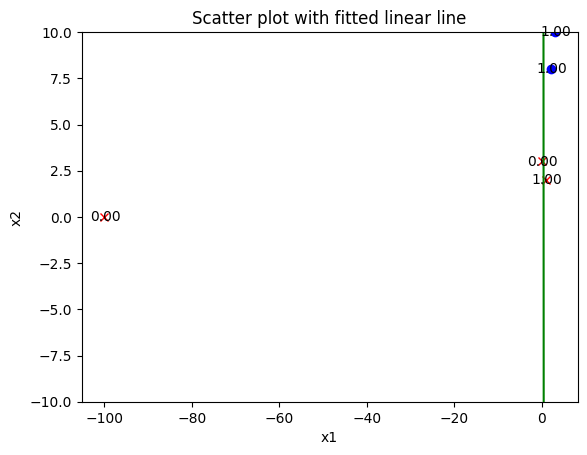

In [57]:
%matplotlib inline

# plot different class with different sign
for i in range(len(y)):
    if y[i] == -1:
        plt.plot(x1[i], x2[i], 'xr')
    else:
        plt.plot(x1[i], x2[i], 'ob')

x_line = np.linspace(np.min(x1), np.max(x1), 100)
y_line = -(w[0] + w[1] * x_line) / w[2]
plt.plot(x_line, y_line, 'g-')
plt.ylim([-10,10])

# Set labels and title
plt.xlabel('x1')
plt.ylabel('x2')
plt.title('Scatter plot with fitted linear line')


# Overlay estimated value with func
for i in range(len(y)):
    plt.text(x1[i]+0.2, x2[i], f'{func([x1[i], x2[i]], w):.2f}', ha='center', va='center')


# Show the plot
plt.show()

outlier 에 영향을 안받지는 않지만... 그래도 터져나가진 않는다!